<a href="https://colab.research.google.com/github/ZGao41/Stack-Overflow-Quick-Search-Engine/blob/main/stack_overflow_Label%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Unzip File, only use it for once***

In [ ]:
# from zipfile import ZipFile

In [ ]:
# with ZipFile('/content/drive/MyDrive/Stack Overflow Project/archive.zip','r') as zipObj:
#   zipObj.extractall('/content/drive/MyDrive/Stack Overflow Project/test')

#import data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
answers=pd.read_csv('/content/drive/MyDrive/Stack Overflow Project/test/Answers.csv',encoding = "ISO-8859-1")

In [ ]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [ ]:
questions=pd.read_csv('/content/drive/MyDrive/Stack Overflow Project/test/Questions.csv',encoding = "ISO-8859-1")

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
questions['Title'][0]

'SQLStatement.execute() - multiple queries in one statement'

In [ ]:
tags=pd.read_csv('/content/drive/MyDrive/Stack Overflow Project/test/Tags.csv',encoding = "ISO-8859-1")

In [ ]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


# Data Exploration on Tags

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
tags['Tag']=tags['Tag'].astype(str)

In [ ]:
# Only use 'Tags' that are above certain threshold
def tags_above_threshold(df,a):
  tag_counts=df['Tag'].value_counts()
  valids = tag_counts[tag_counts>a].index
  tags_new=df[df['Tag'].isin(valids)]
  tag_counts=tags_new['Tag'].value_counts()
  return tag_counts.plot(), tags_new['Tag'].unique(),tags_new

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9103e902d0>,
 array(['sql', 'asp.net', 'algorithm', 'c#', '.net', 'c++', 'web-services',
        'sql-server', 'visual-studio', 'windows', 'database', 'postgresql',
        'html', 'c', 'winforms', 'php', 'mysql', 'ruby', 'java', 'xml',
        'regex', 'forms', 'vb.net', 'asp.net-mvc', 'multithreading',
        'linux', 'javascript', 'css', 'linq', 'osx', 'objective-c',
        'function', 'string', 'apache', 'python', 'sqlite', 'ajax',
        'performance', 'spring', 'ruby-on-rails', 'xcode', 'swing',
        'django', 'arrays', 'hibernate', 'jquery', 'json', 'excel',
        'excel-vba', 'qt', 'android', 'wpf', 'oracle', 'image',
        '.htaccess', 'eclipse', 'perl', 'bash', 'iphone', 'vba', 'git',
        'scala', 'list', 'entity-framework', 'wordpress', 'facebook',
        'matlab', 'ios', 'r', 'swift', 'html5', 'css3', 'node.js',
        'mongodb', 'ruby-on-rails-3', 'python-2.7', 'angularjs',
        'twitter-bootstrap'], dtype=o

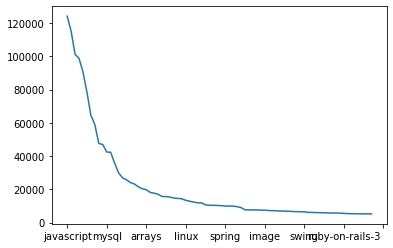

In [ ]:
tags_above_threshold(tags,5000)

In [ ]:
tags_new.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
3,90,svn
7,120,sql
8,120,asp.net


In [ ]:
grouped_tags = tags_new.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.reset_index()
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})

In [ ]:
grouped_tags_final.head()

,Id,Tags
0,80,flex actionscript-3
1,90,svn
2,120,sql asp.net
3,180,algorithm
4,260,c# .net


Merge questions and Tags

In [ ]:
questions_tags=grouped_tags_final.merge(questions,how='right',on='Id')

In [ ]:
questions_tags[(questions_tags['Score']>10) & (questions_tags['Tags'].notnul

,Id,Tags,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,flex actionscript-3,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,svn,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,sql asp.net,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,algorithm,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,c# .net,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...,...
1264164,40142110,NaN,1102835.0,2016-10-19T21:52:30Z,NaN,1,Gradle parent and sub-projects as siblings,"<p>In a gradle multi-module project, can the p..."
1264198,40142870,c# asp.net-mvc,2472888.0,2016-10-19T23:01:59Z,NaN,1,MVC Remote validation is not rendering,<p>I have a model called ItemCodeModel that is...
1264205,40143070,haskell,1031791.0,2016-10-19T23:23:31Z,NaN,6,What exactly makes a type system consistent?,"<p>I've taken AndrÃ¡s KovÃ¡cs's <a href=""https..."
1264210,40143190,python bash,333403.0,2016-10-19T23:36:01Z,NaN,1,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...


In [ ]:
score_counts=questions_tags['Score'].value_counts()
valids = score_counts[score_counts>500].index
question_score_new=questions_tags[questions_tags['Score'].isin(valids)]
questions_score_counts=question_score_new['Score'].value_counts()
questions_score_counts
# return questions_score_counts.plot(), questions_score_counts['Score'].unique(),questions_score_counts

 0     591710
 1     281042
 2     125000
 3      61182
-1      43779
 4      33680
 5      20203
-2      17833
 6      13665
 7       9624
-3       8330
 8       7266
 9       5458
-4       4542
 10      4333
 11      3434
 12      3002
 13      2393
-5       2100
 14      2035
 15      1744
 16      1520
 17      1279
 18      1175
-6       1007
 19       997
 20       911
 21       819
 22       747
 23       648
 24       589
 25       565
 26       523
Name: Score, dtype: int64

In [ ]:
def question_score_above_threshold(df,a):
  score_counts=df['Score'].value_counts()
  valids = score_counts[score_counts>a].index
  question_score_new=df[df['Score'].isin(valids)]
  questions_score_counts=question_score_new['Score'].value_counts()
  return questions_score_counts.plot(), questions_score_counts['Score'].unique(),questions_score_counts

KeyError: ignored

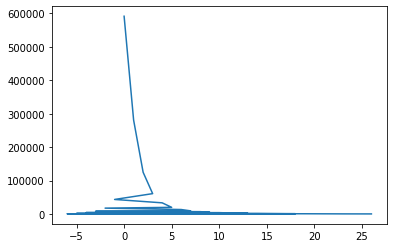

In [ ]:
question_score_above_threshold(questions_tags,500)